In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels

In [3]:
from sklearn.linear_model import LogisticRegression

In [4]:
train =pd.read_csv('aug_train.csv')

## EDA

In [5]:
train.shape

(19158, 14)

In [6]:
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [7]:
print('\nList of Attributes:\n ', list(train.columns))


List of Attributes:
  ['enrollee_id', 'city', 'city_development_index', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job', 'training_hours', 'target']


In [8]:
#check dup
train[train.duplicated()]
#no dup

#Check for missing value 
print(train.isnull().values.any())
#yes missing value

True


In [9]:
#unique values in a column
train.nunique()

enrollee_id               19158
city                        123
city_development_index       93
gender                        3
relevent_experience           2
enrolled_university           3
education_level               5
major_discipline              6
experience                   22
company_size                  8
company_type                  6
last_new_job                  6
training_hours              241
target                        2
dtype: int64

In [10]:
train['education_level'].value_counts()
#consider primary school as an error-> drop 

Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

In [11]:
train['major_discipline'].value_counts()

STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64

In [12]:
train['enrolled_university'].value_counts()
# can't drop no_enroll, majority

no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64

In [13]:
train['gender'].value_counts() 

Male      13221
Female     1238
Other       191
Name: gender, dtype: int64

In [14]:
# convert majoy displine into STEM flag 
flag_stem = pd.DataFrame(np.where(train['major_discipline']=='STEM',1,0), columns=['flag_stem'])
#sum(flag_stem) pass check
#flag_stem

train = pd.concat([train,flag_stem],axis=1)\
    .drop(columns = ['major_discipline'])


In [15]:
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,experience,company_size,company_type,last_new_job,training_hours,target,flag_stem
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,>20,NaN,NaN,1,36,1.0,1
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,15,50-99,Pvt Ltd,>4,47,0.0,1
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,5,NaN,NaN,never,83,0.0,1
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,<1,NaN,Pvt Ltd,never,52,1.0,0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,>20,50-99,Funded Startup,4,8,0.0,1


In [197]:
def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()

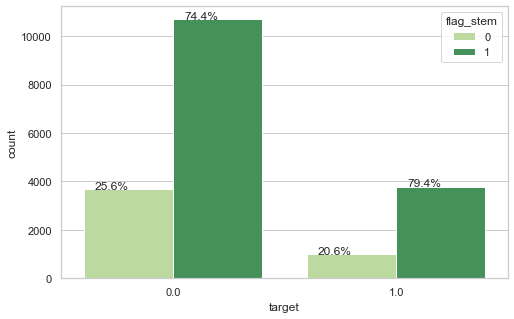

In [198]:
plt.figure(figsize=(8, 5))
sns.set_style('whitegrid')
ax=sns.countplot(x = 'target',hue='flag_stem',data=train,palette='YlGn')

with_hue(ax,train.target,2,2)



<AxesSubplot:xlabel='target', ylabel='count'>

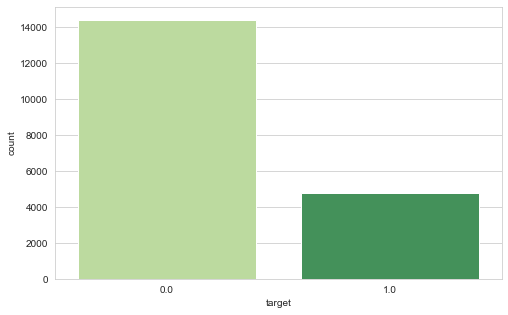

In [17]:
plt.figure(figsize=(8, 5))
sns.set_style('whitegrid')
sns.countplot(x = 'target',data=train,palette='YlGn')

#try hypypeter vs feature engineer before balance the data 

In [18]:
#Transform rest into numeric features
gender_map = {'Female':2,
    'Male':1,
    'Other':3
    
         }

relevent_experience_map = {
    'Has relevent experience':1,
    'No relevent experience':0
}

enrolled_university_map = {
    'no_enrollment': 0,
    'Full time course': 2, 
    'Part time course': 1 
}

education_level_map = {
    'Primary School':0,
    'High School'    : 1,
    'Graduate'       : 2,
    'Masters'        : 3, 
    'Phd'            : 4
    } 

experience_map = {
    '<1'      :0,
    '1'       :    1, 
    '2'       :    2, 
    '3'       :    3, 
    '4'       :    4, 
    '5'       :    5,
    '6'       :    6,
    '7'       :    7,
    '8'       :    8, 
    '9'       :    9, 
    '10'      :    10, 
    '11'      :    11,
    '12'      :    12,
    '13'      :    13, 
    '14'      :    14, 
    '15'      :    15, 
    '16'      :    16,
    '17'      :    17,
    '18'      :    18,
    '19'      :    19, 
    '20'      :    20, 
    '>20'     :    21
} 

company_size_map = {
    '<10'          :    0,
    '10/49'        :    1, 
    '100-500'      :    2, 
    '1000-4999'    :    3, 
    '10000+'       :    4, 
    '50-99'        :    5, 
    '500-999'      :    6, 
    '5000-9999'    :    7
}
    
company_type_map = {
    'Pvt Ltd'               :    0,
    'Funded Startup'        :    1, 
    'Early Stage Startup'   :    2, 
    'Other'                 :    3, 
    'Public Sector'         :    4, 
    'NGO'                   :    5
}

last_new_job_map = {
    'never'        :    0,
    '1'            :    1, 
    '2'            :    2, 
    '3'            :    3, 
    '4'            :    4, 
    '>4'           :    5
}

In [19]:
# Transforming Categorical features into numarical features
train.loc[:,'education_level'] = train['education_level'].map(education_level_map)
train.loc[:,'company_size'] = train['company_size'].map(company_size_map)
train.loc[:,'company_type'] = train['company_type'].map(company_type_map)
train.loc[:,'last_new_job'] = train['last_new_job'].map(last_new_job_map)
train.loc[:,'enrolled_university'] = train['enrolled_university'].map(enrolled_university_map)
train.loc[:,'relevent_experience'] = train['relevent_experience'].map(relevent_experience_map)
train.loc[:,'gender'] = train['gender'].map(gender_map)
train.loc[:,'experience'] = train['experience'].map(experience_map)

train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,experience,company_size,company_type,last_new_job,training_hours,target,flag_stem
0,8949,city_103,0.920,1.0,1,0.0,2.0,21.0,NaN,NaN,1.0,36,1.0,1
1,29725,city_40,0.776,1.0,0,0.0,2.0,15.0,5.0,0.0,5.0,47,0.0,1
2,11561,city_21,0.624,NaN,0,2.0,2.0,5.0,NaN,NaN,0.0,83,0.0,1
3,33241,city_115,0.789,NaN,0,NaN,2.0,0.0,NaN,0.0,0.0,52,1.0,0
4,666,city_162,0.767,1.0,1,0.0,3.0,21.0,5.0,1.0,4.0,8,0.0,1


In [20]:
# drop person ID and City
train.drop(['enrollee_id'],axis=1,inplace=True)
train.drop(['city'],axis=1,inplace=True)

train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  19158 non-null  float64
 1   gender                  14650 non-null  float64
 2   relevent_experience     19158 non-null  int64  
 3   enrolled_university     18772 non-null  float64
 4   education_level         18698 non-null  float64
 5   experience              19093 non-null  float64
 6   company_size            13220 non-null  float64
 7   company_type            13018 non-null  float64
 8   last_new_job            18735 non-null  float64
 9   training_hours          19158 non-null  int64  
 10  target                  19158 non-null  float64
 11  flag_stem               19158 non-null  int32  
dtypes: float64(9), int32(1), int64(2)
memory usage: 1.7 MB


,city_development_index,gender,relevent_experience,enrolled_university,education_level,experience,company_size,company_type,last_new_job,training_hours,target,flag_stem
0,0.920,1.0,1,0.0,2.0,21.0,NaN,NaN,1.0,36,1.0,1
1,0.776,1.0,0,0.0,2.0,15.0,5.0,0.0,5.0,47,0.0,1
2,0.624,NaN,0,2.0,2.0,5.0,NaN,NaN,0.0,83,0.0,1
3,0.789,NaN,0,NaN,2.0,0.0,NaN,0.0,0.0,52,1.0,0
4,0.767,1.0,1,0.0,3.0,21.0,5.0,1.0,4.0,8,0.0,1


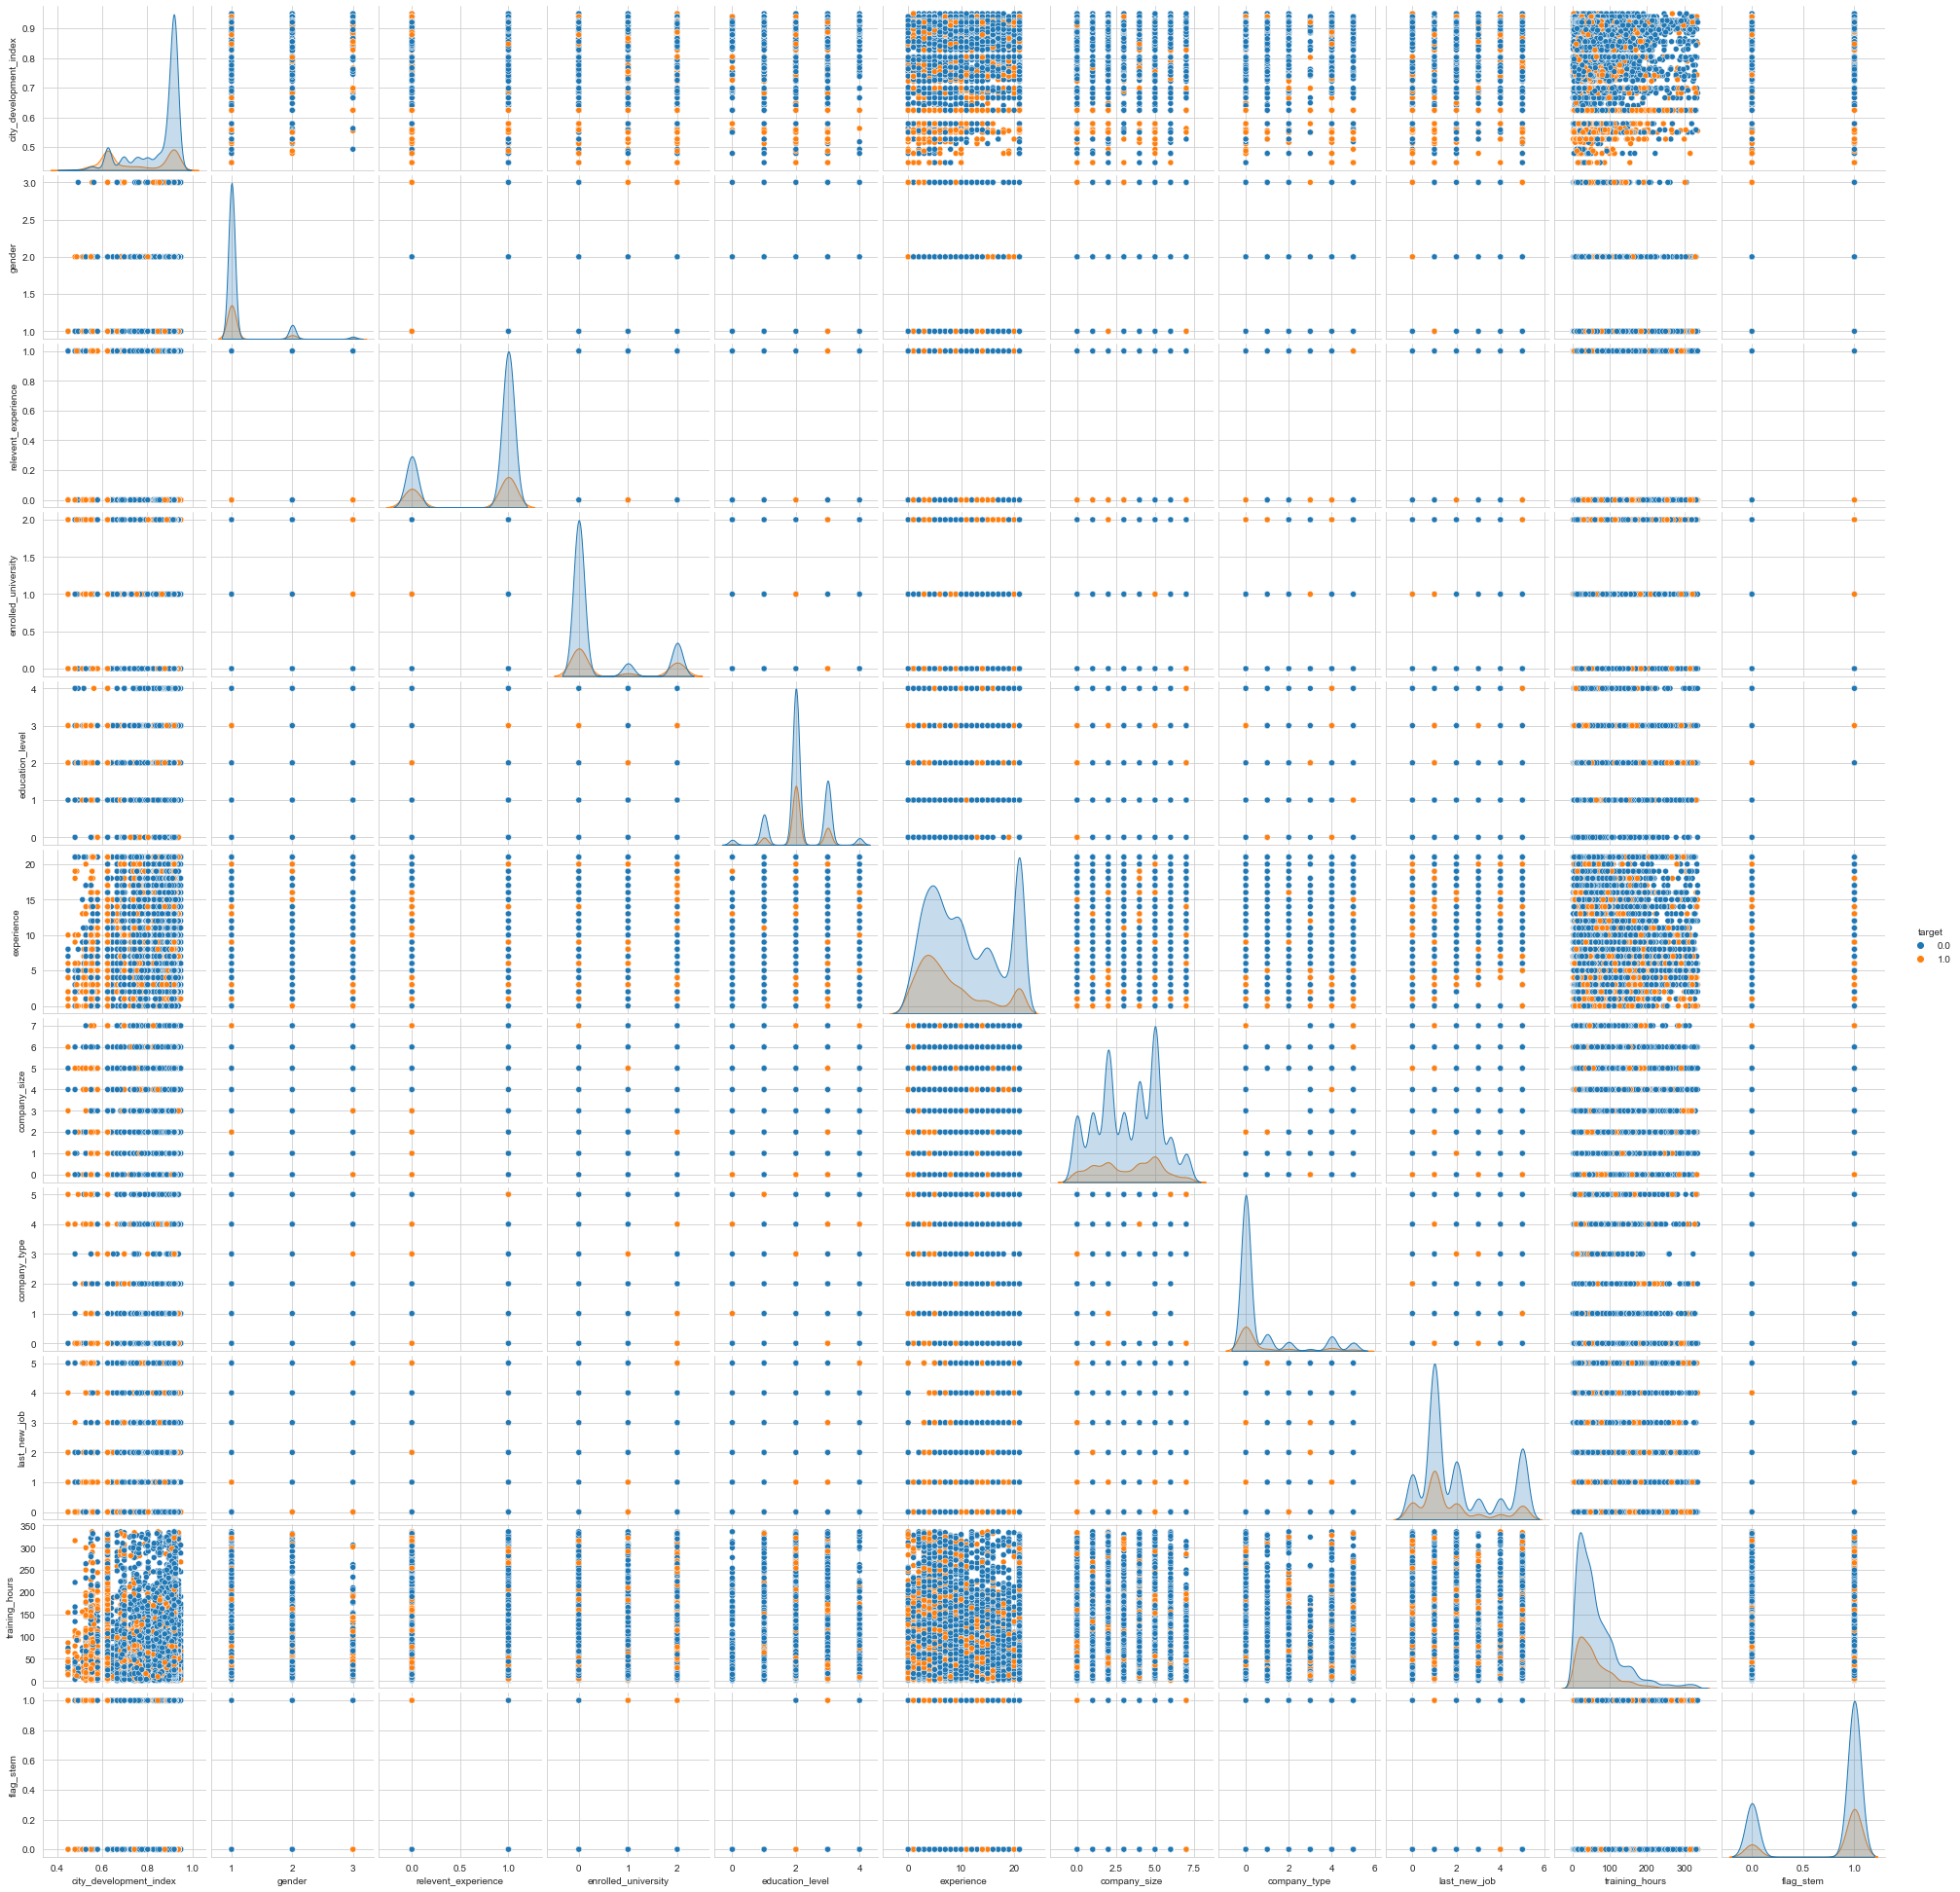

In [21]:
sns.pairplot(train, hue = 'target')
# don't see a seperating by existing features+ degree dummy 

In [23]:
#drop any NA
train.isna().sum()
#?? replace with -999 or Drop them? 

#Baseline rate for true DS job seeker
#np.mean(y_train)

#before drop any missing data, it's 25% seek other options to treat missing data


city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
flag_stem                    0
dtype: int64

In [24]:
# fill na with zero (option2)
train = train.fillna(0)

In [25]:
train.isna().sum()

#drop missing value (option1)
#train.dropna(inplace=True)
#Leave Missing values as is

city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
flag_stem                 0
dtype: int64

In [26]:
train.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,experience,company_size,company_type,last_new_job,training_hours,target,flag_stem
0,0.920,1.0,1,0.0,2.0,21.0,0.0,0.0,1.0,36,1.0,1
1,0.776,1.0,0,0.0,2.0,15.0,5.0,0.0,5.0,47,0.0,1
2,0.624,0.0,0,2.0,2.0,5.0,0.0,0.0,0.0,83,0.0,1
3,0.789,0.0,0,0.0,2.0,0.0,0.0,0.0,0.0,52,1.0,0
4,0.767,1.0,1,0.0,3.0,21.0,5.0,1.0,4.0,8,0.0,1


In [107]:
#Scale
train[['city_development_index','training_hours']].agg(['mean','std'])

,city_development_index,training_hours
mean,0.846889,65.185543
std,0.114260,60.077400


## Assign X,Y  Split data

In [27]:
X = train[train.columns[~train.columns.isin(['target'])]]
y = train['target']

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=42)

In [29]:
np.mean(y_train) # closer to before treatment 

0.24957588411849146

## Random Forest / remove null, nan,missing value

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100) #initial estimator
#Train the model using the training sets 
rf.fit(X_train,y_train)

y_pred_rf=rf.predict(X_test)


In [221]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_rf)




array([[2528,  352],
       [ 534,  418]], dtype=int64)

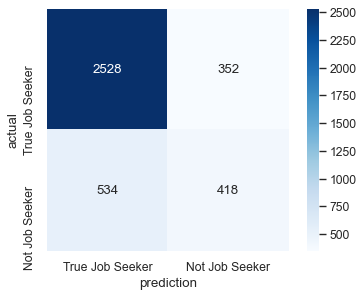

In [222]:
confusion = confusion_matrix(y_test, y_pred_rf)
plt.figure(dpi=80)
sns.heatmap(confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['True Job Seeker', 'Not Job Seeker'],
           yticklabels=['True Job Seeker', 'Not Job Seeker']);
plt.xlabel('prediction')
plt.ylabel('actual');

In [32]:
from sklearn.metrics import precision_score, recall_score, f1_score
print(f"Precision: {precision_score(y_test,y_pred_rf)}")
print(f"Recall: {recall_score(y_test,y_pred_rf)}")
print(f"F1: {f1_score(y_test,y_pred_rf)}")

Precision: 0.5428571428571428
Recall: 0.43907563025210083
F1: 0.4854819976771196


In [33]:
feature = pd.Series(rf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature

training_hours            0.258412
city_development_index    0.253179
experience                0.142175
company_size              0.088972
last_new_job              0.069530
education_level           0.047302
gender                    0.041267
enrolled_university       0.030002
company_type              0.029172
relevent_experience       0.022116
flag_stem                 0.017873
dtype: float64

No handles with labels found to put in legend.


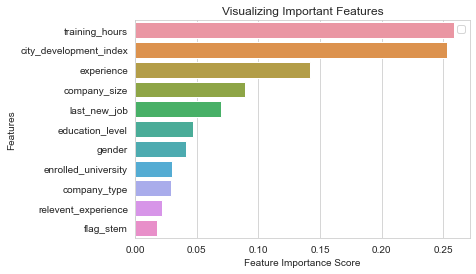

In [34]:
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature, y=feature.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [146]:
#Take 7 mins to run 
from sklearn.model_selection import GridSearchCV
#Parameter
param_grid = {
    'max_depth':[10,20,30],
    'min_samples_leaf':[5,7,9],
    'min_samples_split':[2,4,6],
    'n_estimators':[100,150,200]  
}
rf=RandomForestClassifier(random_state=42)#set random state
rf.fit(X_train,y_train)
grid_rf = GridSearchCV(rf,param_grid,cv=3,scoring='f1')
grid_rf.fit(X_train,y_train)

#proba_rf = 0.5 #initial test
proba_rf = 0.466 # adjustment 0.56 
y_predict_rf = (grid_rf.predict_proba(X_train)[:,1]>proba_rf)
y_predict_rf_test = (grid_rf.predict_proba(X_test)[:,1]>proba_rf)

print(grid_rf.best_estimator_)

print(f'training f1 score: {f1_score(y_train,y_predict_rf)}')
print(f'test f1 score: {f1_score(y_test,y_predict_rf_test)}')
#best test f1 0.61

RandomForestClassifier(max_depth=20, min_samples_leaf=9, n_estimators=150,
                       random_state=42)
training f1 score: 0.6458333333333334
test f1 score: 0.5633210719915923


In [204]:
#Adjust Random Forest 
rf_adjust=RandomForestClassifier(n_estimators=150,max_depth=20, min_samples_leaf=9,random_state=42) #after adjustment
#Train the model using the training sets 
rf_adjust.fit(X_train,y_train)

You could indeed wrap you random forest in a class 
that a predict methods that calls the predict_proba method of the internal random forest
and output class 1 only if it's higher than a custom threshold.

predict=rf_adjust.predict(X_test)
#y_pred_rf_adjust=rf_adjust.predict(X_test)
t=0.466
y_pred_rf_adjust = rf_adjust.predict(X_test)
proba(label==1) > t

print(f"Precision: {precision_score(y_test,y_pred_rf_adjust)}")
print(f"Recall: {recall_score(y_test,y_pred_rf_adjust)}")
print(f'Test f1 score: {f1_score(y_test,y_pred_rf_adjust)}')


Precision: 0.560145808019441
Recall: 0.4842436974789916
test f1 score: 0.5194366197183099


In [207]:
rf_adjust.predict(X_test)

array([0., 0., 0., ..., 1., 1., 0.])

Random Forest Model threshold 0.466


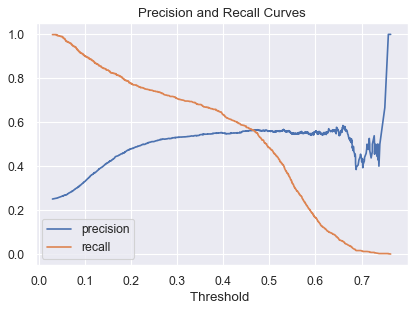

In [145]:
#precision recall curve
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, rf_adjust.predict_proba(X_test)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')

plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold ');
plt.title('Precision and Recall Curves');

#best_f1_score = np.max(f1_scores) 
#best_thresh_p = thresh_ps[np.argmax(f1_scores)]

print('Random Forest Model threshold %.3f' 
      % (threshold_curve[(np.where(np.abs(precision_curve[1:]-recall_curve[1:])==0))]))
#print(np.where(np.abs(precision_curve[1:]-recall_curve[1:])==0))
#print(precision_curve[2845])
#print(recall_curve[2845])
#print(threshold_curve[(np.where(np.abs(precision_curve[1:]-recall_curve[1:])==0))])

Random Forest Model best F1 score 0.610 at prob decision threshold >= 0.263


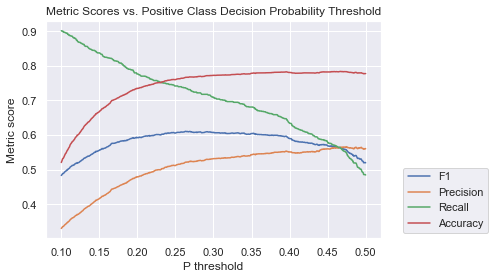

In [120]:
X_val, y_val = X_test, y_test 

thresh_ps = np.linspace(.10,.50,1000)
model_val_probs = rf_adjust.predict_proba(X_val)[:,1] # positive class probs, same basic logistic model we fit in section 2 

f1_scores, prec_scores, rec_scores, acc_scores = [], [], [], []
for p in thresh_ps:
    model_val_labels = model_val_probs >= p
    f1_scores.append(f1_score(y_val, model_val_labels))    
    prec_scores.append(precision_score(y_val, model_val_labels))
    rec_scores.append(recall_score(y_val, model_val_labels))
    acc_scores.append(accuracy_score(y_val, model_val_labels))
    
plt.plot(thresh_ps, f1_scores)
plt.plot(thresh_ps, prec_scores)
plt.plot(thresh_ps, rec_scores)
plt.plot(thresh_ps, acc_scores)

plt.title('Metric Scores vs. Positive Class Decision Probability Threshold')
plt.legend(['F1','Precision','Recall','Accuracy'], bbox_to_anchor=(1.05, 0), loc='lower left')
plt.xlabel('P threshold')
plt.ylabel('Metric score')

best_f1_score = np.max(f1_scores) 
best_thresh_p = thresh_ps[np.argmax(f1_scores)]

print('Random Forest Model best F1 score %.3f at prob decision threshold >= %.3f' 
      % (best_f1_score, best_thresh_p))


In [214]:
#Class weights
lr = RandomForestClassifier(n_estimators=150,max_depth=20, min_samples_leaf=9,random_state=42) #after adjustment
lr_balanced = RandomForestClassifier(n_estimators=150,max_depth=20, min_samples_leaf=9,random_state=42,class_weight='balanced')
lr_4x = RandomForestClassifier(n_estimators=150,max_depth=20, min_samples_leaf=9,random_state=42,class_weight={1 : 4, 0 : 1})

lr.fit(X_train, y_train)
print('Normal Logistic Regression Test F1: %.3f, Test AUC: %.3f' % \
      (f1_score(y_test, lr.predict(X_test)), roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])))

lr_balanced.fit(X_train, y_train)
print('Balanced class weights Logistic Regression Test F1: %.3f, Test AUC: %.3f' % \
      (f1_score(y_test, lr_balanced.predict(X_test)), roc_auc_score(y_test, lr_balanced.predict_proba(X_test)[:,1])))

lr_4x.fit(X_train, y_train)
print('4:1 class weights Logistic Regression Test F1: %.3f, Test AUC: %.3f' % \
      (f1_score(y_test, lr_4x.predict(X_test)), roc_auc_score(y_test, lr_4x.predict_proba(X_test)[:,1])))

Normal Logistic Regression Test F1: 0.519, Test AUC: 0.789
Balanced class weights Logistic Regression Test F1: 0.613, Test AUC: 0.787
4:1 class weights Logistic Regression Test F1: 0.609, Test AUC: 0.789


Precision: 0.5367008681925809
Recall: 0.7142857142857143
F1: 0.6128886885984678


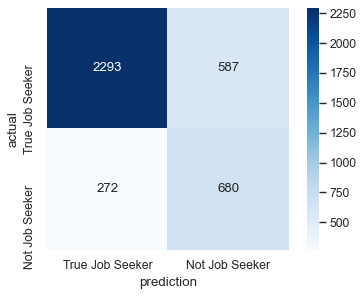

In [217]:
print(f"Precision: {precision_score(y_test,lr_balanced.predict(X_test))}")
print(f"Recall: {recall_score(y_test,lr_balanced.predict(X_test))}")
print(f"F1: {f1_score(y_test,lr_balanced.predict(X_test))}")

confusion = confusion_matrix(y_test, lr_balanced.predict(X_test))
plt.figure(dpi=80)
sns.heatmap(confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['True Job Seeker', 'Not Job Seeker'],
           yticklabels=['True Job Seeker', 'Not Job Seeker']);
plt.xlabel('prediction')
plt.ylabel('actual');

Precision: 0.5188749074759438
Recall: 0.7363445378151261
F1: 0.6087711680416849


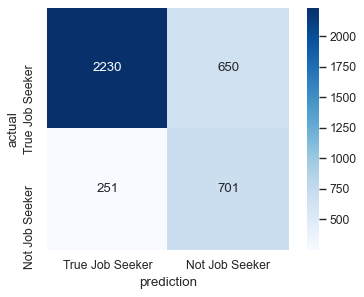

In [226]:
print(f"Precision: {precision_score(y_test,lr_4x.predict(X_test))}")
print(f"Recall: {recall_score(y_test,lr_4x.predict(X_test))}")
print(f"F1: {f1_score(y_test,lr_4x.predict(X_test))}")

confusion = confusion_matrix(y_test,lr_4x.predict(X_test))

plt.figure(dpi=80)
sns.heatmap(confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['True Job Seeker', 'Not Job Seeker'],
           yticklabels=['True Job Seeker', 'Not Job Seeker']);
plt.xlabel('prediction')
plt.ylabel('actual');

## Gradient Boosting Classifier 

In [63]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=100, max_depth=3,learning_rate=.71)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)


In [64]:
print(f"Precision: {precision_score(y_test,y_pred_gb)}")
print(f"Recall: {recall_score(y_test,y_pred_gb)}")
print(f"F1: {f1_score(y_test,y_pred_gb)}")

Precision: 0.554601226993865
Recall: 0.47478991596638653
F1: 0.511601584606678


In [65]:
confusion_matrix(y_test,y_pred_gb)

array([[2517,  363],
       [ 500,  452]], dtype=int64)

Precision: 0.554601226993865
Recall: 0.47478991596638653
F1: 0.511601584606678


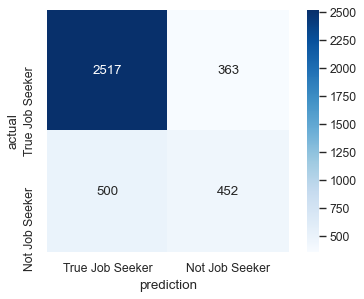

In [229]:
print(f"Precision: {precision_score(y_test,y_pred_gb)}")
print(f"Recall: {recall_score(y_test,y_pred_gb)}")
print(f"F1: {f1_score(y_test,y_pred_gb)}")

confusion = confusion_matrix(y_test,y_pred_gb)

plt.figure(dpi=80)
sns.heatmap(confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['True Job Seeker', 'Not Job Seeker'],
           yticklabels=['True Job Seeker', 'Not Job Seeker']);
plt.xlabel('prediction')
plt.ylabel('actual');

## Logistic Regression

In [42]:
logreg= LogisticRegression()

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=42)

<AxesSubplot:>

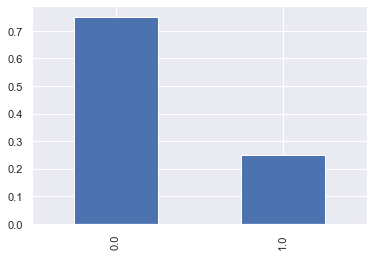

In [181]:
#imbalanced predict target.  
target_pcts = train['target'].value_counts(normalize = True)
target_pcts.plot(kind='bar')

In [45]:
X.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,experience,company_size,company_type,last_new_job,training_hours,flag_stem
0,0.920,1.0,1,0.0,2.0,21.0,0.0,0.0,1.0,36,1
1,0.776,1.0,0,0.0,2.0,15.0,5.0,0.0,5.0,47,1
2,0.624,0.0,0,2.0,2.0,5.0,0.0,0.0,0.0,83,1
3,0.789,0.0,0,0.0,2.0,0.0,0.0,0.0,0.0,52,0
4,0.767,1.0,1,0.0,3.0,21.0,5.0,1.0,4.0,8,1


## Split the data

In [71]:
#Baseline rate for true DS job seeker
np.mean(y_train)

#before drop any missing data, it's 25% seek other options to treat missing data


0.16315652626105046

## Look at City index for Bucketing

<AxesSubplot:>

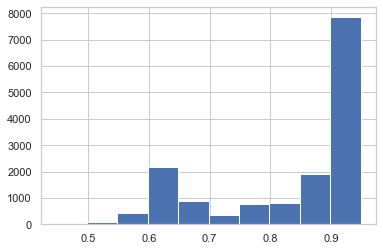

In [199]:
X_train['city_development_index'].hist() 

<AxesSubplot:>

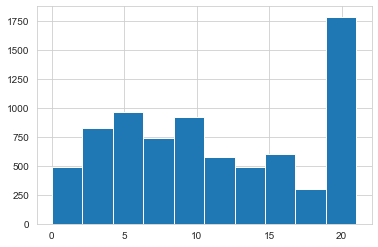

In [73]:
X_train['experience'].hist() 

In [ ]:
X_train['training_hours'].hist()
#replace never with 0 
# replace >4 with a number 
#Or score the rate 0,1,2,3,4,6    >4 weights more than 5
#Should I clean it in test data set? 

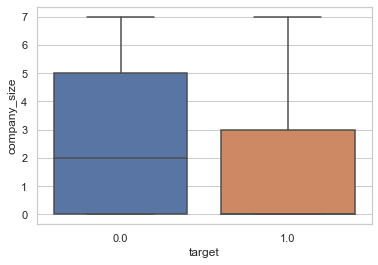

In [201]:
sns.boxplot(x='target',y='company_size', data=train)



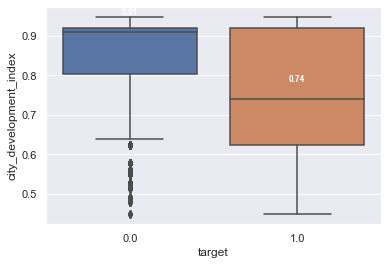

In [189]:
#sns.boxplot(x='target',y='city_development_index', data=train)

box_plot = sns.boxplot(x="target",y="city_development_index",data=train)

medians = train.groupby(['target'])['city_development_index'].median()
vertical_offset = train['city_development_index'].median() * 0.05 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='center',size='x-small',color='w',weight='semibold')

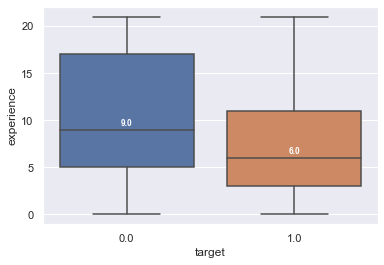

In [195]:
#sns.boxplot(x='target',y='experience', data=train)

box_plot = sns.boxplot(x="target",y="experience",data=train)

medians = train.groupby(['target'])['experience'].median()
vertical_offset = train['experience'].median() * 0.05 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='center',size='x-small',color='w',weight='semibold')

plt.savefig('EDA.png')

In [93]:
#Scale Data
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()

X_train_scaled = std_scale.fit_transform(X_train)
X_test_scaled = std_scale.fit_transform(X_test)


## Fit a regression model

In [101]:
from sklearn.linear_model import LogisticRegression

lr_model_all = LogisticRegression(C = 100)
lr_model_all.fit(X_train_scaled, y_train)
#y_prob_pred_test = lr_model_all.predict_proba(X_test)[:,1]
y_pred_test = lr_model_all.predict(X_test_scaled)
y_pred_train = lr_model_all.predict(X_train_scaled)

#taken from code below
print(f"Precision: {precision_score(y_test,y_pred_test)}")
print(f"Recall: {recall_score(y_test,y_pred_test)}")
print(f"Train F1: {f1_score(y_train,y_pred_train)}")
print(f"Test F1: {f1_score(y_test,y_pred_test)}")

Precision: 0.5562770562770563
Recall: 0.2699579831932773
Train F1: 0.3785121046121223
Test F1: 0.36350777934936357


## Confusion Matrix

In [102]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_test)


array([[2675,  205],
       [ 695,  257]], dtype=int64)

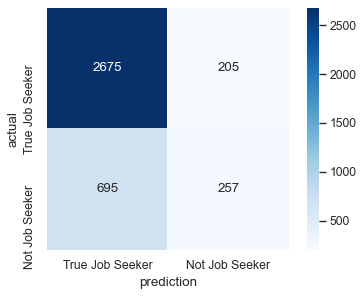

In [202]:
confusion = confusion_matrix(y_test, y_pred_test)
plt.figure(dpi=80)
sns.heatmap(confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['True Job Seeker', 'Not Job Seeker'],
           yticklabels=['True Job Seeker', 'Not Job Seeker']);
plt.xlabel('prediction')
plt.ylabel('actual');

In [99]:
lr_model_all.score(X_train_scaled, y_train)

0.7705206838052981

In [104]:
lr_model_all.coef_,lr_model_all.intercept_

(array([[-0.68046634,  0.01189762, -0.16338423,  0.11361339,  0.09625685,
         -0.17727834, -0.38653725, -0.0569272 ,  0.11559945, -0.0585535 ,
          0.18289445]]),
 array([-1.29485095]))

In [49]:
sorted(X_train.columns)

['city_development_index',
 'company_size',
 'company_type',
 'education_level',
 'enrolled_university',
 'experience',
 'flag_stem',
 'gender',
 'last_new_job',
 'relevent_experience',
 'training_hours']

In [105]:
from sklearn.metrics import precision_score, recall_score, f1_score

print(f"Precision: {precision_score(y_test,y_pred_test)}")
print(f"Recall: {recall_score(y_test,y_pred_test)}")
print(f"F1: {f1_score(y_test,y_pred_test)}")

Precision: 0.5562770562770563
Recall: 0.2699579831932773
F1: 0.36350777934936357


Text(0, 0.5, 'Precision')

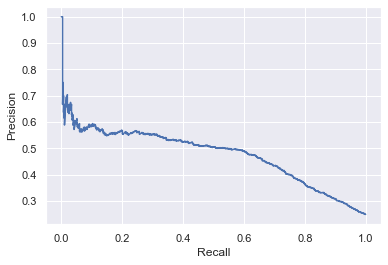

In [107]:
from sklearn.metrics import precision_recall_curve
y_decision_function = lr_model_all.decision_function(X_test_scaled)
precision,recall,threhold = precision_recall_curve(y_test,y_decision_function)
plt.plot(recall,precision)
plt.xlabel('Recall')
plt.ylabel('Precision')

## Change cut off value 

In [113]:
# How to keep it in the LG model? 
Y_pred = (lr_model_all.predict_proba(X_test_scaled)[:,1] >0.275)

print(f"Precision: {precision_score(y_test,Y_pred)}")
print(f"Recall: {recall_score(y_test,Y_pred)}")
print(f"F1: {f1_score(y_test,Y_pred)}")

Precision: 0.4734375
Recall: 0.6365546218487395
F1: 0.5430107526881721


Logistic Regression Model best F1 score 0.543 at prob decision threshold >= 0.275


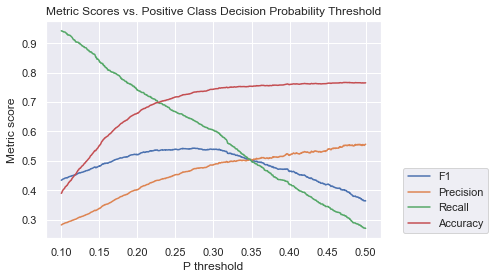

In [109]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

X_val, y_val = X_test_scaled, y_test # explicitly calling this validation since we're using it for selection

thresh_ps = np.linspace(.10,.50,1000)
model_val_probs = lr_model_all.predict_proba(X_val)[:,1] # positive class probs, same basic logistic model we fit in section 2 

f1_scores, prec_scores, rec_scores, acc_scores = [], [], [], []
for p in thresh_ps:
    model_val_labels = model_val_probs >= p
    f1_scores.append(f1_score(y_val, model_val_labels))    
    prec_scores.append(precision_score(y_val, model_val_labels))
    rec_scores.append(recall_score(y_val, model_val_labels))
    acc_scores.append(accuracy_score(y_val, model_val_labels))
    
plt.plot(thresh_ps, f1_scores)
plt.plot(thresh_ps, prec_scores)
plt.plot(thresh_ps, rec_scores)
plt.plot(thresh_ps, acc_scores)

plt.title('Metric Scores vs. Positive Class Decision Probability Threshold')
plt.legend(['F1','Precision','Recall','Accuracy'], bbox_to_anchor=(1.05, 0), loc='lower left')
plt.xlabel('P threshold')
plt.ylabel('Metric score')

best_f1_score = np.max(f1_scores) 
best_thresh_p = thresh_ps[np.argmax(f1_scores)]

print('Logistic Regression Model best F1 score %.3f at prob decision threshold >= %.3f' 
      % (best_f1_score, best_thresh_p))

In [75]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)
Y_pred_knn = knn.predict(X_test)


In [76]:
confusion_matrix(y_test,y_pred_test)

array([[2754,  126],
       [ 800,  152]], dtype=int64)

In [77]:
print(f"Precision: {precision_score(y_test,Y_pred_knn)}")
print(f"Recall: {recall_score(y_test,Y_pred_knn)}")
print(f"F1: {f1_score(y_test,Y_pred_knn)}")

Precision: 0.44871794871794873
Recall: 0.11029411764705882
F1: 0.17706576728499154


In [61]:
y_pred_proba = (lr_model_all.predict_proba(X_test)[:,1] )
y_pred_proba

Y_pred = (lr_model_all.predict_proba(X_test_scaled)[:,1] >0.275)


array([0.10601588, 0.09689108, 0.15530437, ..., 0.46837619, 0.61951366,
       0.1489633 ])

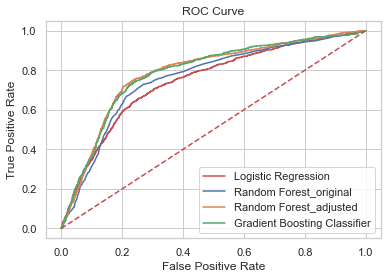

In [228]:
from sklearn.metrics import roc_curve

#defined probability
y_pred_proba = (lr_model_all.predict_proba(X_test_scaled)[:,1] )
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr,'r')

#fpr, tpr, _ = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
#plt.plot(fpr, tpr)
#'10-NN'

fpr, tpr, _ = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)

fpr, tpr, _ = roc_curve(y_test, lr_balanced.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)

fpr, tpr, _ = roc_curve(y_test, gb.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)

#fpr, tpr, _ = roc_curve(y_test, vc.predict_proba(X_test)[:,1])
#plt.plot(fpr, tpr)

#fpr, tpr, _ = roc_curve(y_test, sc.predict_proba(X_test)[:,1])
#plt.plot(fpr, tpr)

#y_pred_proba =(lr_os.predict_proba(X_test_scaled)[:,1] )
#fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
#plt.plot(fpr, tpr)

x = np.linspace(0,1, 100000)
plt.plot(x, x, linestyle='--')


plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Logistic Regression','Random Forest_original',\
            'Random Forest_adjusted','Gradient Boosting Classifier'])

## Ensembling

In [ ]:
#Ensembling  # rbc 0.43 and rf 0.39f1
model_list=[('gb',gb),
            ('random forest',rf_adjust),
            ('log reg',lr_model_all)
           #lg not working as it predict probability not binary 
]

In [ ]:
#Voting classifier Majority 
from sklearn.ensemble import VotingClassifier 
vc=VotingClassifier(estimators=model_list,voting = 'hard',weights=None)

In [ ]:
vc.fit(X_train_scaled,y_train)

y_pred_vc = vc.predict(X_test_scaled)

print(f"F1: {f1_score(y_test,y_pred_vc)}")

In [ ]:
X_train_scaled = std_scale.fit_transform(X_train)
X_test_scaled = std_scale.fit_transform(X_test)


In [ ]:
#Stacking classifier
from sklearn.ensemble import StackingClassifier 

#Ensembling  # rbc 0.43 and rf 0.39f1
model_list=[('gb',gb),
            ('random forest',rf_adjust),
            ('log reg',lr_model_all)
           #lg not working as it predict probability not binary 
]
sc=StackingClassifier(estimators=model_list,
                     final_estimator=LogisticRegression())#Meta-classifier
sc.fit(X_train_scaled,y_train)

y_pred_sc = sc.predict(X_test_scaled)

print(f"F1: {f1_score(y_test,y_pred_sc)}")


## Oversample

In [156]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
import imblearn.over_sampling
# setup for the ratio argument of RandomOverSampler initialization
n_pos = np.sum(y_train == 1)
n_neg = np.sum(y_train == 0)
ratio = {1 : n_pos * 4, 0 : n_neg} 

In [160]:
# randomly oversample positive samples: create 4x as many 
ROS = imblearn.over_sampling.RandomOverSampler(sampling_strategy = ratio, random_state=42) 
    
X_tr_rs, y_tr_rs = ROS.fit_resample(X_train_scaled, y_train)

lr = LogisticRegression(solver='liblinear') 
lr.fit(X_train_scaled, y_train)

from  sklearn.metrics import roc_auc_score
print('Simple Logistic Regression; Test F1: %.3f, Test AUC: %.3f' % \
      (f1_score(y_test, lr.predict(X_test_scaled)), roc_auc_score(y_test, lr.predict_proba(X_test_scaled)[:,1]))) 

lr_os = LogisticRegression(solver='liblinear') 
lr_os.fit(X_tr_rs, y_tr_rs)

print('Logistic Regression on Oversampled Train Data; Test F1: %.3f, Test AUC: %.3f' % \
      (f1_score(y_test, lr_os.predict(X_test_scaled)), roc_auc_score(y_test, lr_os.predict_proba(X_test_scaled)[:,1])))

Simple Logistic Regression; Test F1: 0.364, Test AUC: 0.744
Logistic Regression on Oversampled Train Data; Test F1: 0.524, Test AUC: 0.746


C:\Users\wangz\anaconda3\lib\site-packages\imblearn\utils\_validation.py:299: UserWarning: After over-sampling, the number of samples (15300) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 11501)
  warnings.warn(


In [162]:
smote = imblearn.over_sampling.SMOTE(sampling_strategy=ratio, random_state = 42)
    
X_tr_smote, y_tr_smote = smote.fit_resample(X_train_scaled, y_train)

lr_smote = LogisticRegression(solver='liblinear') 
lr_smote.fit(X_tr_smote, y_tr_smote)

print('Logistic Regression on SMOTE Train Data; Test F1: %.3f, Test AUC: %.3f' % \
      (f1_score(y_test, lr_smote.predict(X_test_scaled)), roc_auc_score(y_test, lr_smote.predict_proba(X_test_scaled)[:,1])))

Logistic Regression on SMOTE Train Data; Test F1: 0.524, Test AUC: 0.746


C:\Users\wangz\anaconda3\lib\site-packages\imblearn\utils\_validation.py:299: UserWarning: After over-sampling, the number of samples (15300) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 11501)
  warnings.warn(


In [171]:
#Class weights
lr = LogisticRegression(solver='liblinear') 
lr_balanced = LogisticRegression(class_weight='balanced', solver='liblinear')
lr_4x = LogisticRegression(class_weight={1 : 4, 0 : 1}, solver='liblinear')

lr.fit(X_train_scaled, y_train)
print('Normal Logistic Regression Test F1: %.3f, Test AUC: %.3f' % \
      (f1_score(y_test, lr.predict(X_test_scaled)), roc_auc_score(y_test, lr.predict_proba(X_test_scaled)[:,1])))

lr_balanced.fit(X_train_scaled, y_train)
print('Balanced class weights Logistic Regression Test F1: %.3f, Test AUC: %.3f' % \
      (f1_score(y_test, lr_balanced.predict(X_test_scaled)), roc_auc_score(y_test, lr_balanced.predict_proba(X_test_scaled)[:,1])))

lr_4x.fit(X_train_scaled, y_train)
print('4:1 class weights Logistic Regression Test F1: %.3f, Test AUC: %.3f' % \
      (f1_score(y_test, lr_4x.predict(X_test_scaled)), roc_auc_score(y_test, lr_4x.predict_proba(X_test_scaled)[:,1])))

Normal Logistic Regression Test F1: 0.364, Test AUC: 0.744
Balanced class weights Logistic Regression Test F1: 0.540, Test AUC: 0.746
4:1 class weights Logistic Regression Test F1: 0.524, Test AUC: 0.746


Logistic Regression Model best F1 score 0.543 at prob decision threshold >= 0.275


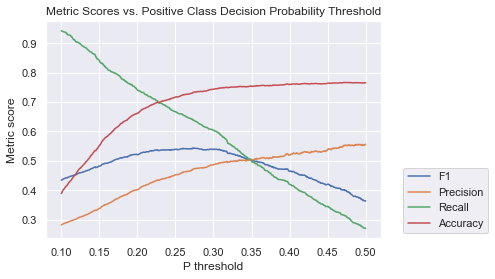

In [172]:

sns.set()

X_val, y_val = X_test_scaled, y_test # explicitly calling this validation since we're using it for selection

thresh_ps = np.linspace(.10,.50,1000)
model_val_probs = lr.predict_proba(X_val)[:,1] # positive class probs, same basic logistic model we fit in section 2 

f1_scores, prec_scores, rec_scores, acc_scores = [], [], [], []
for p in thresh_ps:
    model_val_labels = model_val_probs >= p
    f1_scores.append(f1_score(y_val, model_val_labels))    
    prec_scores.append(precision_score(y_val, model_val_labels))
    rec_scores.append(recall_score(y_val, model_val_labels))
    acc_scores.append(accuracy_score(y_val, model_val_labels))
    
plt.plot(thresh_ps, f1_scores)
plt.plot(thresh_ps, prec_scores)
plt.plot(thresh_ps, rec_scores)
plt.plot(thresh_ps, acc_scores)

plt.title('Metric Scores vs. Positive Class Decision Probability Threshold')
plt.legend(['F1','Precision','Recall','Accuracy'], bbox_to_anchor=(1.05, 0), loc='lower left')
plt.xlabel('P threshold')
plt.ylabel('Metric score')

best_f1_score = np.max(f1_scores) 
best_thresh_p = thresh_ps[np.argmax(f1_scores)]

print('Logistic Regression Model best F1 score %.3f at prob decision threshold >= %.3f' 
      % (best_f1_score, best_thresh_p))